# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
# 運算 Tool
import numpy as np

# 畫圖 Tool
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 使用 K-mean 聚類演算法
from sklearn.cluster import KMeans

# 給予隨機種子
np.random.seed(5)

In [3]:
# 設定 模型 估計參數
estimators = [('k_means_9', KMeans(n_clusters=9)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_2', KMeans(n_clusters=2, n_init=1,
                                               init='random'))]

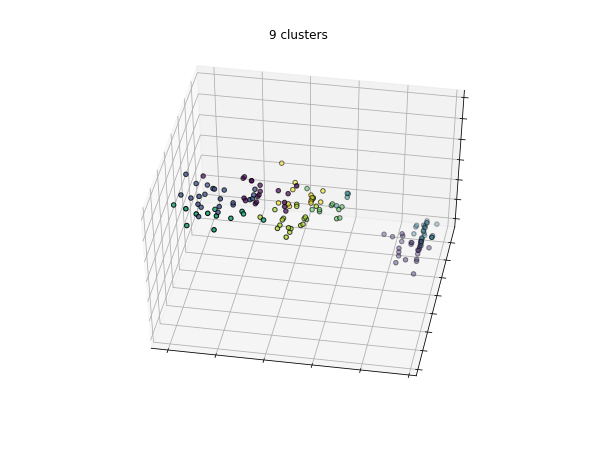

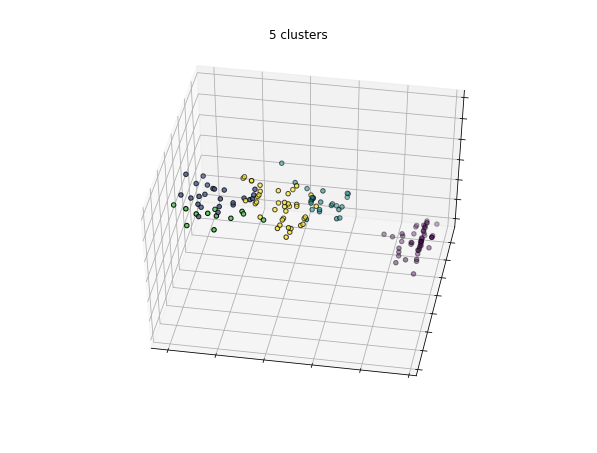

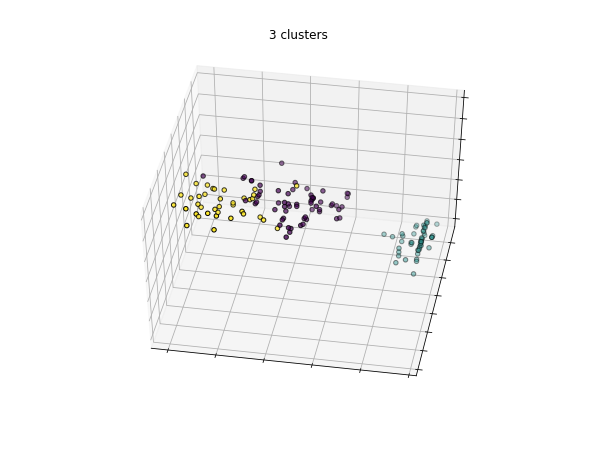

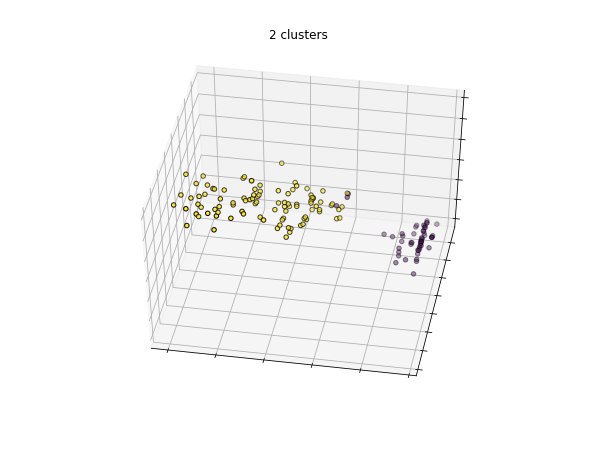

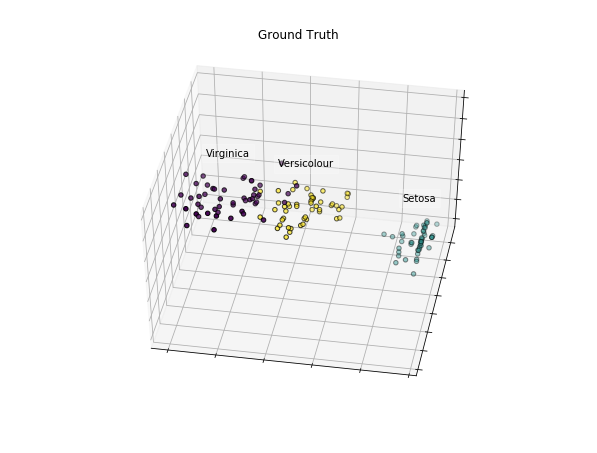

In [4]:
fignum = 1
titles = ['9 clusters', '5 clusters', '3 clusters', '2 clusters']

for name, est in estimators:
    # 決定畫布大小.
    fig = plt.figure(fignum, figsize=(4, 3))
    # elev:elevation angle, azim:azimuth angle, rect:size
    ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=48, azim=100)
    
    ## fit data
    est.fit(X)
    
    # load labels
    labels = est.labels_
    # c:color(透過不同的labels自動決定顏色), edgecolor:edge color.
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=48, azim=100)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    # 將 X 資料分成三筆，分別對應到實際的位置(z, x, y).在加上名子與顯示的位置資料等資訊.
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12